# 연관 규칙 분석

먼저 필요한 라이브러리를 설치해야 한다.<br><br><br>사전 설치가 필요한 Library 리스트<br>
pip install numpy-1.13.1+mkl-cp36-cp36m-win_amd64.whl<br>
pip install scipy-0.19.1-cp36-cp36m-win_amd64.whl<br>
pip install mlxtend<br>
pip install sklearn<br>

In [1]:
# 필요한 라이브러리 로드
import pandas as pd

In [2]:
# 분석할 데이터 불러오기
titanic = pd.read_table('./data/titanic.txt')
titanic.shape # 읽어온 데이터 구조 확인
titanic.head() # 가장 앞 5개의 데이터를 출력
titanic.tail() # 가장 뒤 5개의 데이터를 출력

,Name,PClass,Age,Sex,Survived
1308,"Zakarian, Mr Artun",3rd,27.0,male,0
1309,"Zakarian, Mr Maprieder",3rd,26.0,male,0
1310,"Zenni, Mr Philip",3rd,22.0,male,0
1311,"Lievens, Mr Rene",3rd,24.0,male,0
1312,"Zimmerman, Leo",3rd,29.0,male,0


In [3]:
# Remove "Name" column
titanic_ar = titanic.iloc[:, 1:5]
titanic_ar.head()

,PClass,Age,Sex,Survived
0,1st,29.00,female,1
1,1st,2.00,female,0
2,1st,30.00,male,0
3,1st,25.00,female,0
4,1st,0.92,male,1


In [4]:
# Age를 명목형 변수로 변경
c_idx = titanic_ar.loc[:,'Age'] < 20
a_idx = titanic_ar.loc[:,'Age'] >= 20
na_idx = titanic_ar.loc[:,'Age'].isnull()

In [5]:
titanic_ar.loc[c_idx,'Age'] = 'Child'
titanic_ar.loc[a_idx,'Age'] = 'Adult'
titanic_ar.loc[na_idx,'Age'] = 'Unknown'

In [6]:
titanic_ar.head(20) # 변경된 데이터 확인

,PClass,Age,Sex,Survived
0,1st,Adult,female,1
1,1st,Child,female,0
2,1st,Adult,male,0
3,1st,Adult,female,0
4,1st,Child,male,1
5,1st,Adult,male,1
6,1st,Adult,female,1
7,1st,Adult,male,0
8,1st,Adult,female,1
9,1st,Adult,male,0


In [7]:
survived_idx = titanic_ar.loc[:,'Survived'] == 1
dead_idx = titanic_ar.loc[:,'Survived'] == 0
titanic_ar.loc[survived_idx,'Survived'] = 'Survived'
titanic_ar.loc[dead_idx,'Survived'] = 'Dead'

In [8]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import association_rules

In [9]:
dataset = titanic_ar.values.tolist()
oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,1st,2nd,3rd,Adult,Child,Dead,Survived,Unknown,female,male
0,1,0,0,1,0,0,1,0,1,0
1,1,0,0,0,1,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1
3,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,1,0,0,1
5,1,0,0,1,0,0,1,0,0,1
6,1,0,0,1,0,0,1,0,1,0
7,1,0,0,1,0,1,0,0,0,1
8,1,0,0,1,0,0,1,0,1,0
9,1,0,0,1,0,1,0,0,0,1


In [10]:
frequent_itemsets = apriori(df, use_colnames=True,min_support=0.1)
frequent_itemsets

,support,itemsets
0,0.245240,[1st]
1,0.213252,[2nd]
2,0.541508,[3rd]
3,0.462300,[Adult]
4,0.113481,[Child]
5,0.657273,[Dead]
6,0.342727,[Survived]
7,0.424219,[Unknown]
8,0.351866,[female]
9,0.648134,[male]


In [11]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules


,antecedants,consequents,support,confidence,lift
0,(3rd),(Dead),0.541508,0.805907,1.226137
1,(male),(Dead),0.648134,0.833137,1.267566
2,(Dead),(male),0.657273,0.821553,1.267566
3,"(1st, female)",(Survived),0.108911,0.937063,2.734141
4,"(male, 2nd)",(Dead),0.131759,0.855491,1.301576
5,"(Dead, 2nd)",(male),0.122620,0.919255,1.418309
6,"(3rd, Unknown)",(Dead),0.299315,0.847328,1.289156
7,"(female, Dead)",(3rd),0.117289,0.857143,1.582881
8,"(male, 3rd)",(Dead),0.380046,0.883768,1.344596
9,"(Adult, male)",(Dead),0.300838,0.825316,1.255667


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedants,consequents,support,confidence,lift
0,(1st),(Adult),0.245240,0.633540,1.370409
1,(Adult),(1st),0.462300,0.336079,1.370409
2,(1st),(Survived),0.245240,0.599379,1.748854
3,(Survived),(1st),0.342727,0.428889,1.748854
4,(1st),(female),0.245240,0.444099,1.262127
5,(female),(1st),0.351866,0.309524,1.262127
6,(Adult),(2nd),0.462300,0.278418,1.305584
7,(2nd),(Adult),0.213252,0.603571,1.305584
8,(Dead),(3rd),0.657273,0.663963,1.226137
9,(3rd),(Dead),0.541508,0.805907,1.226137


In [13]:

# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules


,antecedants,consequents,support,confidence,lift,antecedant_len
0,(1st),(Adult),0.245240,0.633540,1.370409,1
1,(Adult),(1st),0.462300,0.336079,1.370409,1
2,(1st),(Survived),0.245240,0.599379,1.748854,1
3,(Survived),(1st),0.342727,0.428889,1.748854,1
4,(1st),(female),0.245240,0.444099,1.262127,1
5,(female),(1st),0.351866,0.309524,1.262127,1
6,(Adult),(2nd),0.462300,0.278418,1.305584,1
7,(2nd),(Adult),0.213252,0.603571,1.305584,1
8,(Dead),(3rd),0.657273,0.663963,1.226137,1
9,(3rd),(Dead),0.541508,0.805907,1.226137,1


In [14]:
# 길이가 2개 이상이고, Confidence가 0.75이상, lift가 1.2 이상인 Rule 출력
rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedants,consequents,support,confidence,lift,antecedant_len
16,"(1st, female)",(Survived),0.108911,0.937063,2.734141,2
22,"(male, 2nd)",(Dead),0.131759,0.855491,1.301576,2
23,"(Dead, 2nd)",(male),0.122620,0.919255,1.418309,2
26,"(Adult, 3rd)",(Dead),0.178218,0.794872,1.209347,2
28,"(Dead, Unknown)",(3rd),0.319878,0.792857,1.464165,2
30,"(3rd, Unknown)",(Dead),0.299315,0.847328,1.289156,2
34,"(female, Dead)",(3rd),0.117289,0.857143,1.582881,2
36,"(male, 3rd)",(Dead),0.380046,0.883768,1.344596,2
42,"(Adult, male)",(Dead),0.300838,0.825316,1.255667,2
43,"(Adult, Dead)",(male),0.285605,0.869333,1.341286,2


In [15]:
# 죽은 경우에 대해서 Rule 분석
rules[ (rules['confidence'] > 0.75) &
       (rules['consequents'] == frozenset({'Dead'})) ]

,antecedants,consequents,support,confidence,lift,antecedant_len
9,(3rd),(Dead),0.541508,0.805907,1.226137,1
12,(male),(Dead),0.648134,0.833137,1.267566,1
22,"(male, 2nd)",(Dead),0.131759,0.855491,1.301576,2
26,"(Adult, 3rd)",(Dead),0.178218,0.794872,1.209347,2
30,"(3rd, Unknown)",(Dead),0.299315,0.847328,1.289156,2
36,"(male, 3rd)",(Dead),0.380046,0.883768,1.344596,2
42,"(Adult, male)",(Dead),0.300838,0.825316,1.255667,2
50,"(male, Unknown)",(Dead),0.291698,0.879896,1.338706,2
54,"(Adult, male, 3rd)",(Dead),0.131759,0.867052,1.319165,3
60,"(male, 3rd, Unknown)",(Dead),0.215537,0.908127,1.381658,3


# 장바구니 분석

장바구니 분석 예제를 위해 다음 명령어로 필요한 라이브러리를 설치한다.<br><br>
pip install pytagcloud<br>
pip install pygame<br>
pip install simplejson<br>

In [16]:
transaction = open('./data/groceries.csv','r').readlines()
len(transaction)
gloceries = []
for line in transaction:
    line = line.replace('\n','').split(',')
    gloceries.append(line)
len(gloceries)

9835

In [20]:
from collections import Counter
import pytagcloud
import itertools

In [23]:
nouns = list(itertools.chain(*gloceries))
count = Counter(nouns)
tag2 = count.most_common(100)
taglist = pytagcloud.make_tags(tag2, maxsize=80)
pytagcloud.create_tag_image(taglist, './wordcloud.jpg', size=(1024, 768), fontname='Coustard', rectangular=False)

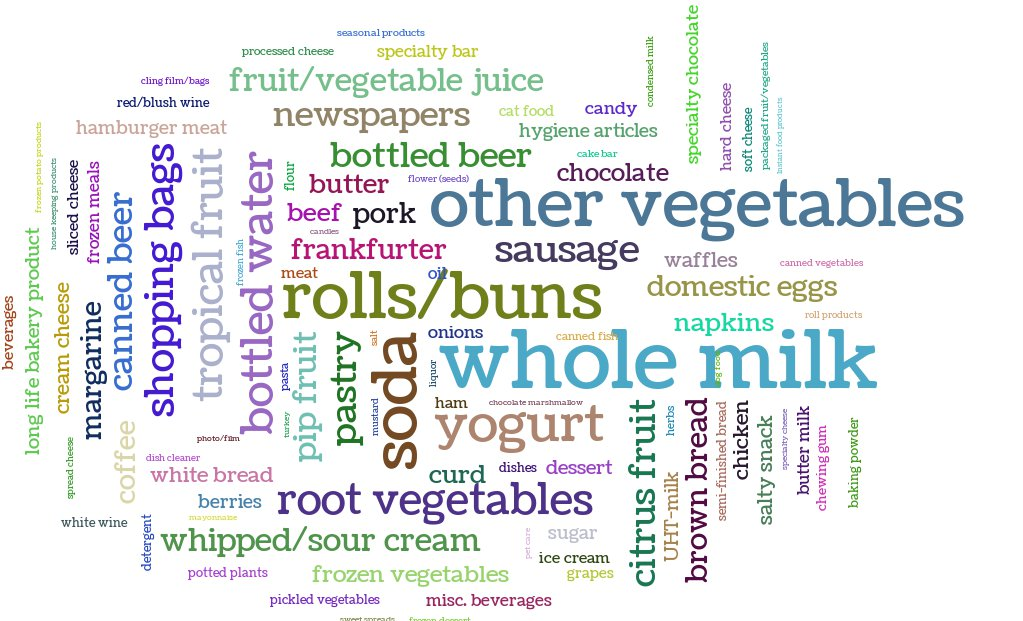

In [27]:
from IPython.display import Image
Image("./wordcloud.jpg")

In [28]:
# Plot histogram using matplotlib bar().
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

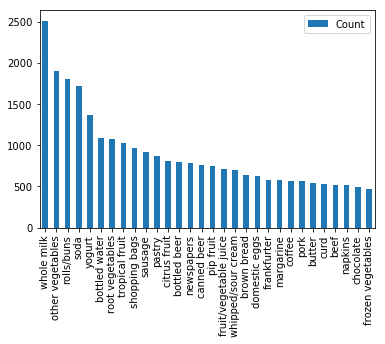

In [32]:
df = pd.DataFrame.from_dict(count, orient='index')
df.columns = ['Count']
view = df.sort_values('Count',ascending=False)[0:30]
%matplotlib inline
view.plot(kind='bar')

In [33]:
### Rule

oht = OnehotTransactions()
oht_ary = oht.fit(gloceries).transform(gloceries)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
frequent_itemsets = apriori(df, use_colnames=True,min_support=0.01)
frequent_itemsets

,support,itemsets
0,0.033452,[UHT-milk]
1,0.017692,[baking powder]
2,0.052466,[beef]
3,0.033249,[berries]
4,0.026029,[beverages]
5,0.080529,[bottled beer]
6,0.110524,[bottled water]
7,0.064870,[brown bread]
8,0.055414,[butter]
9,0.027961,[butter milk]


In [35]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedants,consequents,support,confidence,lift
0,"(other vegetables, butter)",(whole milk),0.020031,0.573604,2.244885
1,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.586207,3.029608
2,"(curd, yogurt)",(whole milk),0.017285,0.582353,2.279125
3,"(domestic eggs, other vegetables)",(whole milk),0.022267,0.552511,2.162336
4,"(other vegetables, pip fruit)",(whole milk),0.026131,0.517510,2.025351
5,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.502092,2.594890
6,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.584541,3.020999
7,"(root vegetables, yogurt)",(other vegetables),0.025826,0.500000,2.584078
8,"(other vegetables, whipped/sour cream)",(whole milk),0.028876,0.507042,1.984385
9,"(other vegetables, yogurt)",(whole milk),0.043416,0.512881,2.007235


In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
# 길이 정보를 갖는 열 추가
rules["antecedant_len"] = rules["antecedants"].apply(lambda x: len(x))
rules

,antecedants,consequents,support,confidence,lift,antecedant_len
0,(beef),(other vegetables),0.052466,0.375969,1.943066,1
1,(other vegetables),(beef),0.193493,0.101944,1.943066,1
2,(beef),(rolls/buns),0.052466,0.259690,1.411858,1
3,(rolls/buns),(beef),0.183935,0.074074,1.411858,1
4,(beef),(root vegetables),0.052466,0.331395,3.040367,1
5,(root vegetables),(beef),0.108998,0.159515,3.040367,1
6,(beef),(whole milk),0.052466,0.405039,1.585180,1
7,(whole milk),(beef),0.255516,0.083168,1.585180,1
8,(beef),(yogurt),0.052466,0.222868,1.597601,1
9,(yogurt),(beef),0.139502,0.083819,1.597601,1


In [41]:
rules.sort_values('lift',ascending=False).head(10)

,antecedants,consequents,support,confidence,lift,antecedant_len
458,"(whole milk, yogurt)",(curd),0.056024,0.179673,3.372304,2
459,(curd),"(whole milk, yogurt)",0.053279,0.188931,3.372304,1
439,"(citrus fruit, other vegetables)",(root vegetables),0.028876,0.359155,3.295045,2
442,(root vegetables),"(citrus fruit, other vegetables)",0.108998,0.095149,3.295045,1
558,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.234192,3.267062,2
563,(whipped/sour cream),"(other vegetables, yogurt)",0.071683,0.141844,3.267062,1
514,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.112873,3.144780,1
511,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.342776,3.144780,2
5,(root vegetables),(beef),0.108998,0.159515,3.040367,1
4,(beef),(root vegetables),0.052466,0.331395,3.040367,1
